In [16]:
import numpy as np
import matplotlib.pyplot as plt

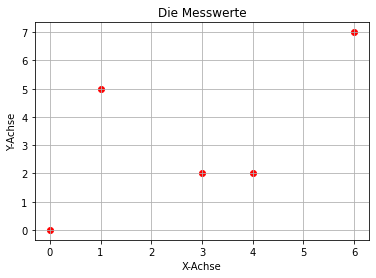

In [17]:
# unsere Messwerte

x= [0,1,3,4,6]
y= [0,5,2,2,7]

# Create a scatter plot
plt.scatter(x, y, color='red')
plt.title('Die Messwerte')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)
plt.show()

In [18]:
'''Alternative Messwerte als Funktionswerte der Sinusfunktion:'''
'''
x=np.linspace(0,2*np.pi,20)
def fun(x):
    return np.sin(x)
y=fun(x)
'''

'\nx=np.linspace(0,2*np.pi,20)\ndef fun(x):\n    return np.sin(x)\ny=fun(x)\n'

In [19]:
h=[]
for i in range(len(x)-1):
    h.append(x[i+1]-x[i])
print("Die Abstände der Messwerte sind:" , h , "\n")

Die Abstände der Messwerte sind: [1, 2, 1, 2] 



In [20]:
B=[]
for i in range(len(x)-2):
    B.append(6*( (y[i+2]-y[i+1])/h[i+1] - (y[i+1]-y[i])/h[i]))
print("Die B_i sind:" , B, "\n")

Die B_i sind: [-39.0, 9.0, 15.0] 



In [21]:
n=len(B)
A=np.zeros((n,n))
for i in range(n):
    A[i][i]=2*(h[i]+h[i+1])
for i in range(1,n):
    A[i-1][i]=h[i]
    A[i][i-1]=h[i]
print("Für unsere Momente erhalten wir das LGS: \n", A, "*M=B")

Für unsere Momente erhalten wir das LGS: 
 [[6. 2. 0.]
 [2. 6. 1.]
 [0. 1. 6.]] *M=B


In [22]:
# unsere Momente mit m_0=0=m_n
M=[0]
Mn=0

#modifiziere die rechte Seite anhand der Einschränkung von m_0 und m_n
B[0]-=h[0]*M[0] 
B[n-1]-=h[n]*Mn

#Löse das LGS z.B per Jacobi-Seidel und ergänze die Momente
M+=np.linalg.solve(A,np.array(B)).tolist() 
M.append(Mn)
print(M)

[0, -7.758064516129032, 3.774193548387097, 1.8709677419354838, 0]


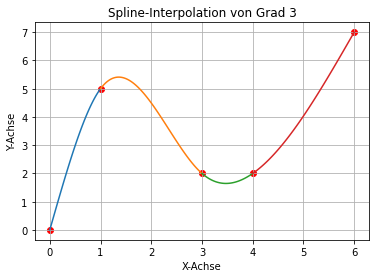

In [23]:
#berechne die stückweise Polynomfunktionen
pols = []
for i in range(len(h)):
    a=y[i]
    c=M[i]/2
    d=(M[i+1]-M[i])/(6*h[i])
    #b=(y[i+1]-y[i])/h[i]-h[i]*c-d*h[i]**2
    b=(y[i+1]-y[i])/h[i]-h[i]*(2*M[i]+M[i+1])/6
    
    f=np.polynomial.Polynomial([a,b,c,d]) #die p_i=f =a+b*x+c*x^2+d*x^3 sind um 0 entwickelt, statt um x_i 
    pols.append(f) #-> entweder ersetze die x_i in den Polynomen oder shifte sie beim plotten
    t=np.linspace(0, h[i], 101)
    plt.plot(t+x[i],f(t))

# zeige den Plot mit Stützstellen:
plt.title('Spline-Interpolation von Grad 3')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)
plt.scatter(x, y, color='red')
plt.show()

In [24]:
# Alternativ definiere unsere stückweise Funktion:

def s(w):
    i=0
    while(w>h[i]):
        w-=h[i]
        i+=1
    return pols[i](w)

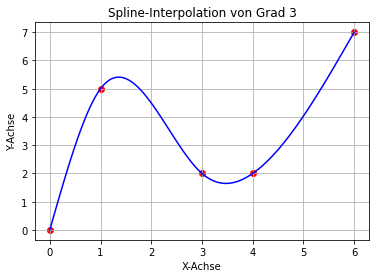

In [25]:
# plotte unsere stückweise Spline-Interpolation 

plotx=np.linspace(x[0], x[-1], 101)
ploty=[]
for t in plotx:
    ploty.append(s(t))
    
plt.plot(plotx,ploty,color='blue')

plt.title('Spline-Interpolation von Grad 3')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)
plt.scatter(x, y, color='red')
plt.show()

In [12]:
# was ist der Fehler? (hier für die Sinusfunktion mit sin''(0)=0=m_0 und sin''(2pi)=0=m_n)
# Hierzu zuerst die Messwerte mit der Sinusfunktion einkommentieren und vorigen Code nochmal ausführen

max=0
for i in range(1000): #probiere zufällig Punkte aus und merk den größten Fehler
    t=np.random.rand()*(x[-1]-x[0])+x[0]
    temp = np.abs(np.sin(t)-s(t))
    if(temp>max):
        max=temp
print(max)
(h[0]**4)*5/384

7.258243814802713


0.013020833333333334

In [26]:
# im Vergleich dazu die Lagrange-Interpolation

import scipy.interpolate as interpol

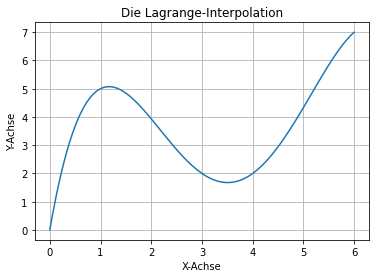

      4         3         2
-0.1 x + 1.467 x - 6.733 x + 10.37 x


In [27]:
lp=interpol.lagrange(x,y)
t=np.linspace(x[0], x[-1],1000)
plt.title('Die Lagrange-Interpolation')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)
plt.plot(t,lp(t))
plt.show()
print(lp)